In [1]:
# Import necessary library
import pandas as pd
!pip install openpyxl

In [2]:
df = pd.read_excel('Twitter_Data.xlsx')

In [3]:
df.head()

,clean_text,category
0,when modi promised â€œminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [5]:
df.shape

(162980, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [7]:
# Are there any missing values in the dataset?

df.isnull().sum() # tells no of missing values in each column in the pandas series format

,0
clean_text,4
category,7


In [9]:
# Check for missing values in the selected columns
missing_indexes = df[df[['clean_text', 'category']].isnull().any(axis=1)].index

# Print the indexes
print(missing_indexes.tolist())

[148, 130448, 155642, 155698, 155770, 158693, 158694, 159442, 159443, 160559, 160560]


In [11]:
# Fill missing 'clean_text' with a placeholder
df['clean_text'].fillna('Unknown', inplace=True)

# Fill missing 'category' with a -1
df['category'].fillna(-1, inplace=True)


<ipython-input-11-1865012217>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category'].fillna(-1, inplace=True)


In [12]:
# Are there any missing values in the dataset?

df.isnull().sum() # tells no of missing values in each column in the pandas series format

,0
clean_text,0
category,0


In [13]:
# Are there any duplicate data in the dataset?

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

       clean_text  category
159443    Unknown       0.0
161347       2019       0.0


In [14]:
# Count the Number of Duplicates

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 2


In [15]:
df.describe()

,category
count,162980.000000
mean,0.225383
std,0.781303
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [16]:
# How is the correlation between cols?

df.corr(numeric_only=True)

,category
category,1.0


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
# Count the Number of Duplicates

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [19]:
!pip install vaderSentiment

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [20]:
analyzer = SentimentIntensityAnalyzer()

In [21]:
def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))
    compound = score['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [22]:
df['Sentiment'] = df['clean_text'].apply(get_sentiment)


In [23]:
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,76332
Negative,50800
Neutral,35846


<ipython-input-24-1663663717>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


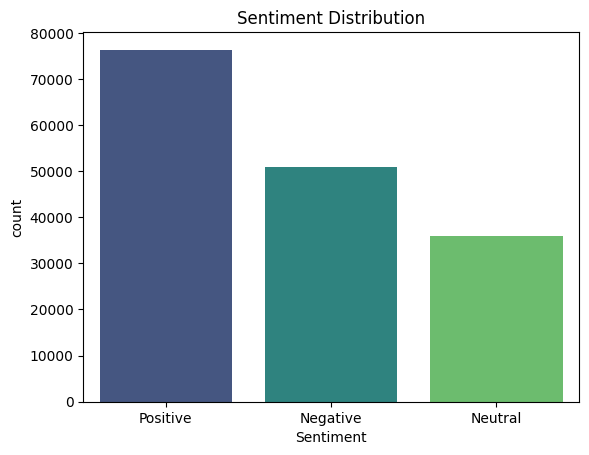

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.show()


In [26]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to string to handle non-string inputs
    text = str(text)
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove punctuation, numbers, special chars
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['clean_text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

# Encode target sentiment
y = df['Sentiment']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.84      0.79      0.82     10242
     Neutral       0.85      0.88      0.86      7190
    Positive       0.87      0.89      0.88     15164

    accuracy                           0.86     32596
   macro avg       0.85      0.85      0.85     32596
weighted avg       0.86      0.86      0.86     32596



In [28]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("This is so awesome!")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998685121536255}]

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Sentiment'])  # 0=Negative, 1=Neutral, 2=Positive


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression\n", classification_report(y_test, lr_pred, target_names=label_encoder.classes_))


Logistic Regression
               precision    recall  f1-score   support

    Negative       0.84      0.79      0.82     10242
     Neutral       0.85      0.88      0.86      7190
    Positive       0.87      0.89      0.88     15164

    accuracy                           0.86     32596
   macro avg       0.85      0.85      0.85     32596
weighted avg       0.86      0.86      0.86     32596



In [33]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes\n", classification_report(y_test, nb_pred, target_names=label_encoder.classes_))


Naive Bayes
               precision    recall  f1-score   support

    Negative       0.79      0.63      0.70     10242
     Neutral       0.77      0.31      0.44      7190
    Positive       0.64      0.90      0.75     15164

    accuracy                           0.69     32596
   macro avg       0.73      0.62      0.63     32596
weighted avg       0.71      0.69      0.67     32596



In [34]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Support Vector Machine\n", classification_report(y_test, svm_pred, target_names=label_encoder.classes_))


Support Vector Machine
               precision    recall  f1-score   support

    Negative       0.85      0.80      0.82     10242
     Neutral       0.86      0.88      0.87      7190
    Positive       0.88      0.89      0.88     15164

    accuracy                           0.86     32596
   macro avg       0.86      0.86      0.86     32596
weighted avg       0.86      0.86      0.86     32596



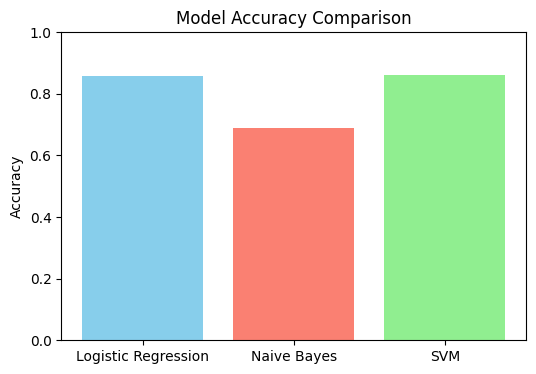

In [35]:
from sklearn.metrics import accuracy_score

accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, lr_pred),
    'Naive Bayes': accuracy_score(y_test, nb_pred),
    'SVM': accuracy_score(y_test, svm_pred)
}

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['skyblue','salmon','lightgreen'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_text'])


In [37]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(len)


In [38]:
df['num_exclamations'] = df['clean_text'].apply(lambda x: x.count('!'))
df['num_uppercase'] = df['clean_text'].apply(lambda x: sum(1 for c in x if c.isupper()))


In [39]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df['vader_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [40]:
from scipy.sparse import hstack

# Select extra features
extra_features = df[['word_count', 'char_count', 'num_exclamations', 'vader_score']].values

# Combine with TF-IDF
X_combined = hstack([X, extra_features])


In [41]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300)
X_svd = svd.fit_transform(X)


<ipython-input-42-1471073807>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


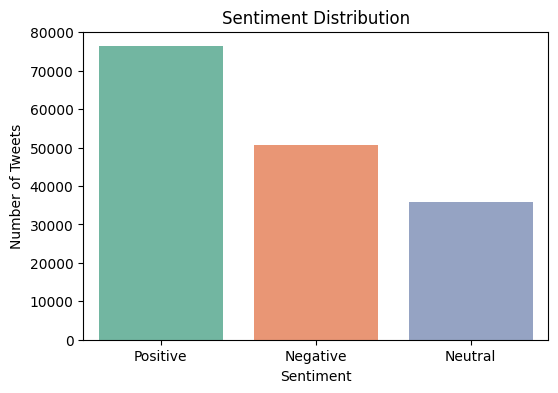

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


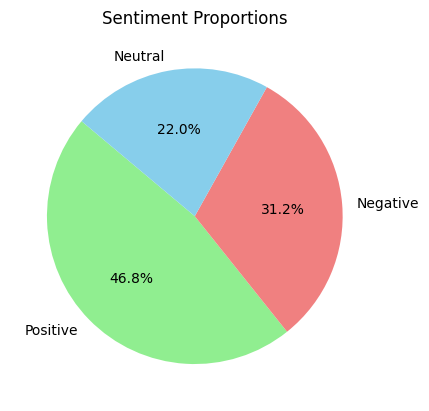

In [43]:
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%',
                                        startangle=140,
                                        colors=['lightgreen', 'lightcoral', 'skyblue'],
                                        labels=['Positive', 'Negative', 'Neutral'])
plt.title("Sentiment Proportions")
plt.ylabel("")
plt.show()


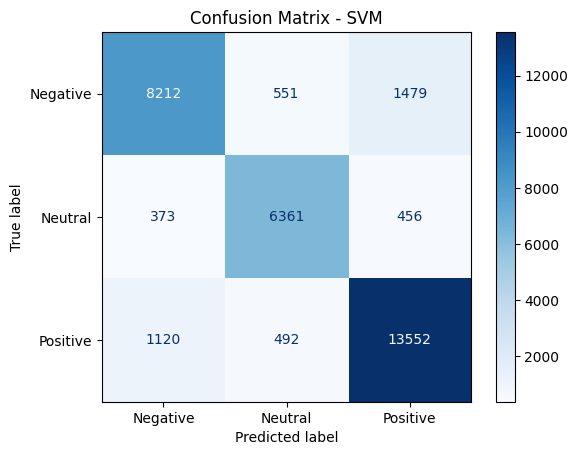

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, svm_pred)  # replace with your model's predictions
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()


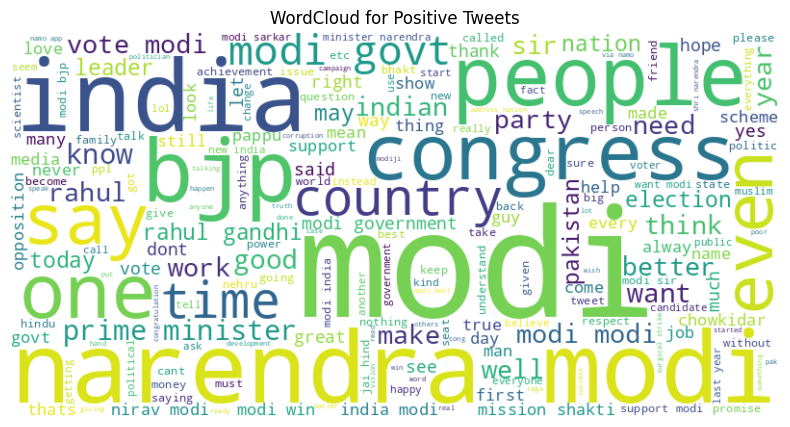

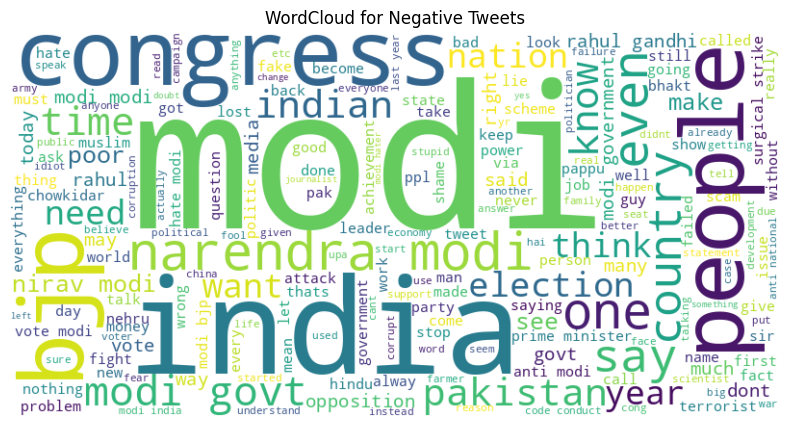

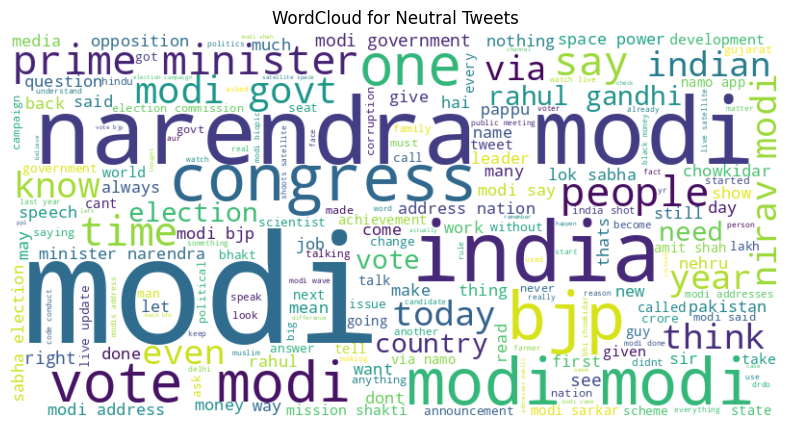

In [45]:
from wordcloud import WordCloud

def generate_wordcloud(sentiment_label):
    text = " ".join(df[df['Sentiment'] == sentiment_label]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment_label} Tweets")
    plt.show()

# Generate for each sentiment
generate_wordcloud("Positive")
generate_wordcloud("Negative")
generate_wordcloud("Neutral")


<ipython-input-46-1861354893>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='pastel')


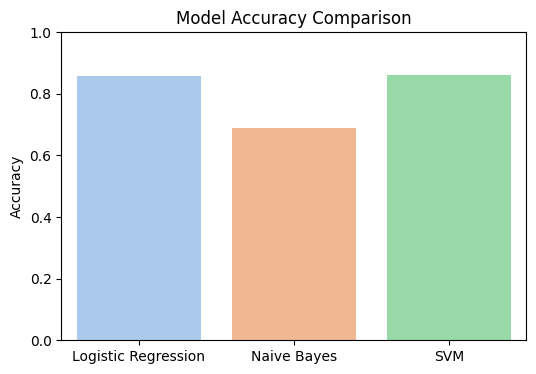

In [46]:
import numpy as np

model_names = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, svm_pred)
]

plt.figure(figsize=(6,4))
sns.barplot(x=model_names, y=accuracies, palette='pastel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.show()
